In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC


In [2]:
df=pd.read_csv("../Pandas Dataset/UniversalBank.csv")
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
df = df.drop(["ID","ZIP Code"], axis = 1)

<Axes: >

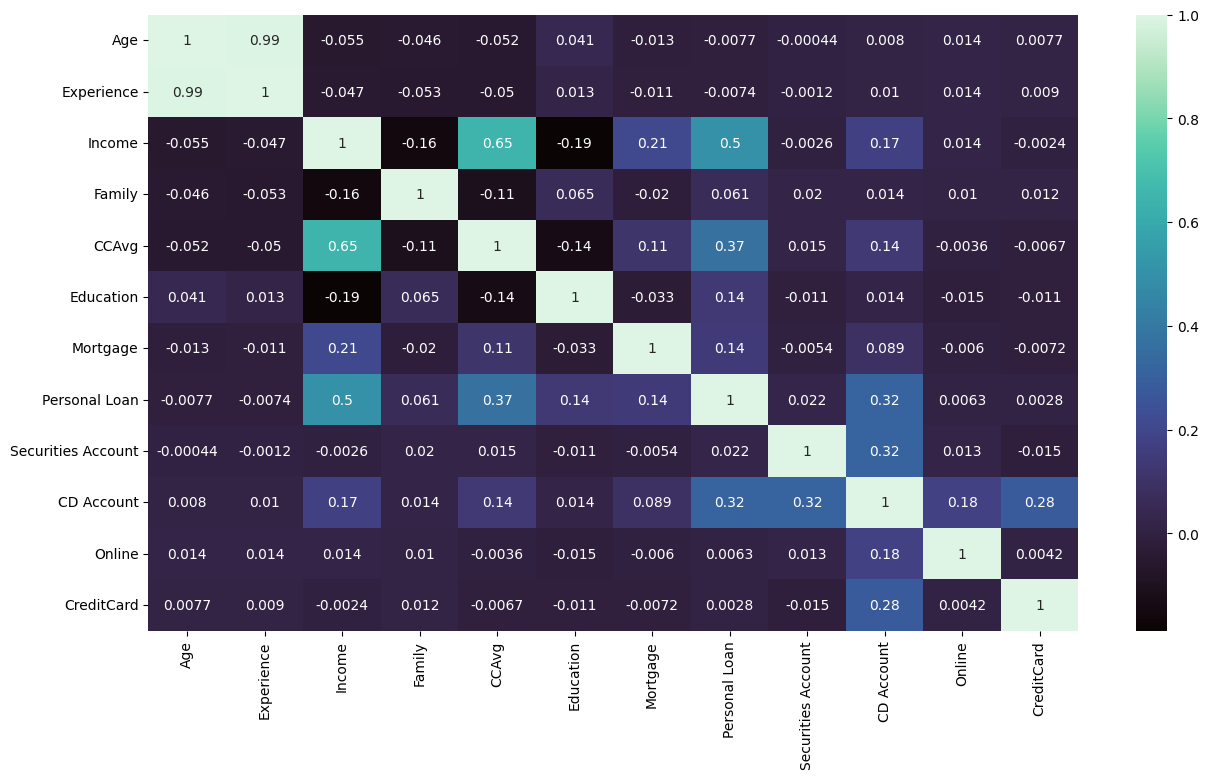

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True, cmap='mako')

In [5]:
x=df.drop("CreditCard",axis=1)
y=df["CreditCard"]

In [10]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_scaled=std.fit_transform(x)

In [13]:
x_scaled

array([[-1.77441684, -1.66607847, -0.53822878, ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-0.02952359, -0.09633022, -0.8641094 , ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-0.55299157, -0.44516316, -1.36379301, ..., -0.34142334,
        -0.25354028, -1.21661774],
       ...,
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.34142334,
        -0.25354028, -1.21661774],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.34142334,
        -0.25354028,  0.82195086],
       [-1.51268285, -1.40445376,  0.20043396, ..., -0.34142334,
        -0.25354028,  0.82195086]])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.8)

In [15]:
model=SVC(kernel="linear")
model.fit(x_train,y_train)

SVC(kernel='linear')

In [18]:
y_predict=model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_predict,y_test)

0.74125

In [20]:
confusion_matrix(y_test,y_predict)

array([[2775,   50],
       [ 985,  190]], dtype=int64)

In [21]:
model=SVC(kernel="rbf")
model.fit(x_train,y_train)

SVC()

In [22]:
y_predict=model.predict(x_test)
accuracy_score(y_predict,y_test)

0.7435